In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In C:\Users\hades\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\hades\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\hades\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\hades\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\hades\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [3]:
path = 'C:\\Users\\hades\\Downloads\\dataset práctica 1\\Pacientes_en_espera.csv'

dataframe = pd.read_csv(path, encoding='latin', error_bad_lines=False)
dataframe.head()

,CODIGO_SEXO,GRUPO_SANGUINEO,RH,ORIGEN_INJERTO,ESTABLECIMIENTO,INSTITUCION,CODIGO_ENTIDAD_FEDERATIVA_ESTABLECIMIENTO,CODIGO_ENTIDAD_FEDERATIVA_ORIGEN_PACIENTE,CODIGO_ENTIDAD_FEDERATIVA_RESIDENCIA_PACIENTE,ORGANO
0,2,O,POSITIVO,CADAVER,UNIDAD MEDICA DE ALTA ESPECIALIDAD HOSPITAL DE...,IMSS,14,99,99,RIÑÓN
1,1,O,POSITIVO,CADAVER,UNIDAD MEDICA DE ALTA ESPECIALIDAD HOSPITAL DE...,IMSS,14,99,99,RIÑÓN
2,2,O,NEGATIVO,CADAVER,UNIDAD MEDICA DE ALTA ESPECIALIDAD HOSPITAL DE...,IMSS,14,99,99,RIÑÓN
3,2,O,POSITIVO,CADAVER,UNIDAD MEDICA DE ALTA ESPECIALIDAD HOSPITAL DE...,IMSS,14,99,99,RIÑÓN
4,2,O,NEGATIVO,CADAVER,UNIDAD MEDICA DE ALTA ESPECIALIDAD HOSPITAL DE...,IMSS,14,99,99,RIÑÓN


In [4]:
dataframe.describe()

,CODIGO_SEXO,CODIGO_ENTIDAD_FEDERATIVA_ESTABLECIMIENTO,CODIGO_ENTIDAD_FEDERATIVA_ORIGEN_PACIENTE,CODIGO_ENTIDAD_FEDERATIVA_RESIDENCIA_PACIENTE
count,23277.000000,23277.000000,23277.000000,23277.000000
mean,1.417708,13.295184,17.659621,17.124629
std,0.493192,6.539806,15.255734,14.219956
min,1.000000,1.000000,1.000000,1.000000
25%,1.000000,9.000000,10.000000,10.000000
50%,1.000000,11.000000,14.000000,14.000000
75%,2.000000,15.000000,21.000000,21.000000
max,2.000000,32.000000,99.000000,99.000000


C:\Users\hades\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\hades\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\hades\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\hades\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWar

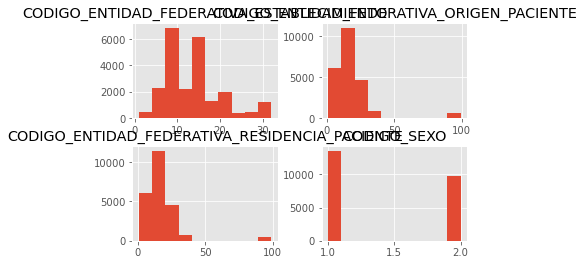

In [5]:
dataframe.hist()
plt.show()

In [6]:
print(dataframe.groupby('ORGANO').size())

ORGANO
BANCO CORNEAS         3
C.P.H.               95
CARA                  1
CORAZÓN              43
CORAZÓN-PULMÓN        1
CÓRNEA             5713
EXTREMIDADES          1
HÍGADO              317
HÍGADO-RIÑÓN          3
MANO                  1
PARATIROIDES         11
PIEL                  1
PULMÓN                4
PÁNCREAS              5
RIÑÓN             17069
RIÑÓN-PÁNCREAS        2
RIÑÓN-RIÑÓN           7
dtype: int64


C:\Users\hades\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


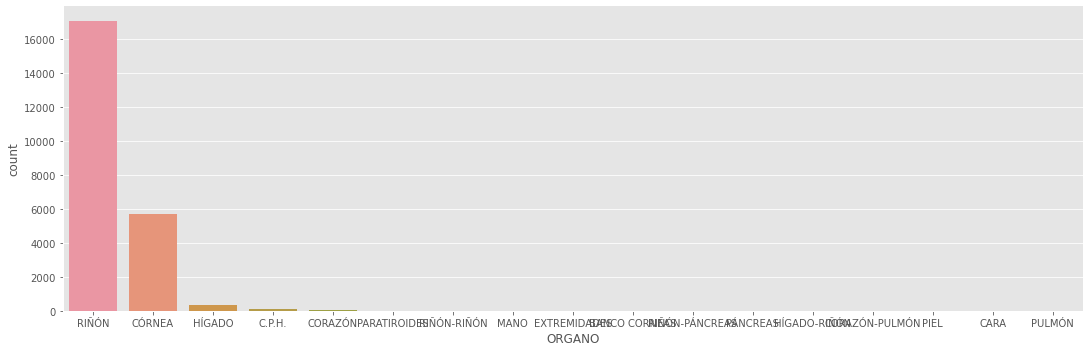

In [7]:
sb.factorplot('ORGANO',data=dataframe,kind="count", aspect=3)

In [8]:
list(dataframe['ORGANO'].unique())

['RIÑÓN',
 'CÓRNEA',
 'HÍGADO',
 'C.P.H.',
 'CORAZÓN',
 'PARATIROIDES',
 'RIÑÓN-RIÑÓN',
 'MANO',
 'EXTREMIDADES',
 'BANCO CORNEAS',
 'RIÑÓN-PÁNCREAS',
 'PÁNCREAS',
 'HÍGADO-RIÑÓN',
 'CORAZÓN-PULMÓN',
 'PIEL',
 'CARA',
 'PULMÓN']

In [11]:
keys = list(dataframe['ORGANO'].unique())
vals = range(1,18)
act = dict(zip(keys, vals))
act

{'RIÑÓN': 1,
 'CÓRNEA': 2,
 'HÍGADO': 3,
 'C.P.H.': 4,
 'CORAZÓN': 5,
 'PARATIROIDES': 6,
 'RIÑÓN-RIÑÓN': 7,
 'MANO': 8,
 'EXTREMIDADES': 9,
 'BANCO CORNEAS': 10,
 'RIÑÓN-PÁNCREAS': 11,
 'PÁNCREAS': 12,
 'HÍGADO-RIÑÓN': 13,
 'CORAZÓN-PULMÓN': 14,
 'PIEL': 15,
 'CARA': 16,
 'PULMÓN': 17}

In [12]:
df_copy = dataframe.copy()
df_copy.head()

,CODIGO_SEXO,GRUPO_SANGUINEO,RH,ORIGEN_INJERTO,ESTABLECIMIENTO,INSTITUCION,CODIGO_ENTIDAD_FEDERATIVA_ESTABLECIMIENTO,CODIGO_ENTIDAD_FEDERATIVA_ORIGEN_PACIENTE,CODIGO_ENTIDAD_FEDERATIVA_RESIDENCIA_PACIENTE,ORGANO
0,2,O,POSITIVO,CADAVER,UNIDAD MEDICA DE ALTA ESPECIALIDAD HOSPITAL DE...,IMSS,14,99,99,RIÑÓN
1,1,O,POSITIVO,CADAVER,UNIDAD MEDICA DE ALTA ESPECIALIDAD HOSPITAL DE...,IMSS,14,99,99,RIÑÓN
2,2,O,NEGATIVO,CADAVER,UNIDAD MEDICA DE ALTA ESPECIALIDAD HOSPITAL DE...,IMSS,14,99,99,RIÑÓN
3,2,O,POSITIVO,CADAVER,UNIDAD MEDICA DE ALTA ESPECIALIDAD HOSPITAL DE...,IMSS,14,99,99,RIÑÓN
4,2,O,NEGATIVO,CADAVER,UNIDAD MEDICA DE ALTA ESPECIALIDAD HOSPITAL DE...,IMSS,14,99,99,RIÑÓN


In [14]:
df_copy['ORGANO'] = dataframe['ORGANO'].map(act)
df_copy.head()

,CODIGO_SEXO,GRUPO_SANGUINEO,RH,ORIGEN_INJERTO,ESTABLECIMIENTO,INSTITUCION,CODIGO_ENTIDAD_FEDERATIVA_ESTABLECIMIENTO,CODIGO_ENTIDAD_FEDERATIVA_ORIGEN_PACIENTE,CODIGO_ENTIDAD_FEDERATIVA_RESIDENCIA_PACIENTE,ORGANO
0,2,O,POSITIVO,CADAVER,UNIDAD MEDICA DE ALTA ESPECIALIDAD HOSPITAL DE...,IMSS,14,99,99,1
1,1,O,POSITIVO,CADAVER,UNIDAD MEDICA DE ALTA ESPECIALIDAD HOSPITAL DE...,IMSS,14,99,99,1
2,2,O,NEGATIVO,CADAVER,UNIDAD MEDICA DE ALTA ESPECIALIDAD HOSPITAL DE...,IMSS,14,99,99,1
3,2,O,POSITIVO,CADAVER,UNIDAD MEDICA DE ALTA ESPECIALIDAD HOSPITAL DE...,IMSS,14,99,99,1
4,2,O,NEGATIVO,CADAVER,UNIDAD MEDICA DE ALTA ESPECIALIDAD HOSPITAL DE...,IMSS,14,99,99,1


In [15]:
list(df_copy['ORGANO'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

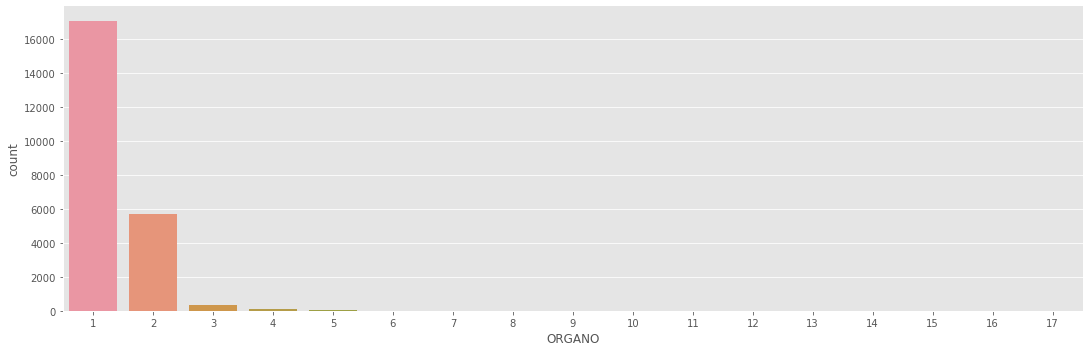

In [16]:
sb.factorplot('ORGANO',data=df_copy,kind="count", aspect=3)

In [17]:

X = df_copy[['ORGANO','CODIGO_SEXO']].values
y = df_copy['ORGANO'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [22]:
n_neighbors = 10

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))


Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 1.00


In [23]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[4305    0    0    0    0    0    0    0    0    0]
 [   0 1397    0    0    0    0    0    0    0    0]
 [   0    0   76    0    0    0    0    0    0    0]
 [   0    0    0   21    0    0    0    0    0    0]
 [   0    0    0    0   13    0    0    0    0    0]
 [   0    0    0    0    0    5    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    1    0    0    0]
 [   0    0    0    0    0    0    0    1    0    0]
 [   0    0    0    0    0    0    0    1    0    0]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      4305
           2       1.00      1.00      1.00      1397
           3       1.00      1.00      1.00        76
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00         5
           7       0.00      0.00      0.00         0
          12       0.00      0.00   

C:\Users\hades\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\hades\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
